In [87]:
# TODO: First test all code methods using one dimensional dimensions first
    # A simple recommended test is to set the feature matrix equal to identity matrix - then the model should give MSE = 0
    # Then test with the Franke fcn mentioned in the notes



# Part a: Ordinary Least Squares on the Franke function
## Create a data set, scale the data (e.g. subtracting mean values) and split into training and test sets

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
#Classes
class DataHandler:
    
    def __init__(self, x, y):
        self._x = x
        self._y = y
        self._featureMatrix = 0
        self._beta = 0
        self._X_train = 0
        self._X_test = 0
        self._y_train = 0
        self._y_test = 0
        self._y_tilde = 0
        self._y_predict = 0

    #TODO: Should really ensure feature matrix has actually been created by this point
    def Get_beta(self):
        return self._beta
    
    def Get_predictions(self):
        return self._X_train, self._X_test, self._y_tilde, self._y_predict
        
    def CreateFeatureMatrix(self, degree):
        poly = PolynomialFeatures(degree, include_bias=True)
        poly_features = poly.fit_transform(self._x.reshape(-1, 1))
        poly.fit(poly_features, self._y)

        self._featureMatrix = poly_features

        return poly_features
    
    #TODO: Does too much - split it 
    def OrdinaryLeastSquaresMSE(self):
        X_train, X_test, y_train, y_test = train_test_split(self._featureMatrix, self._y, test_size=0.2)

        beta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train) #Pseudo inverse to handle singular matrices
        self._beta = beta

        #Make the prediction
        ytilde = X_train @ beta
        ypredict = X_test @ beta

        self._X_train = X_train
        self._X_test = X_test
        self._y_tilde = ytilde
        self._y_predict = ypredict
        self._y_train = y_train
        self._y_test = y_test

        mse_training = error.mean_squared_error(y_train, ytilde)
        mse_test = error.mean_squared_error(y_test, ypredict)

        return (mse_training, mse_test)
    
    #TODO: Be consistent with case use
    def R2ScoreFunction(self):
        r2_training = error.r2_score(self._y_train, self._y_tilde)
        r2_test = error.r2_score(self._y_test, self._y_predict)

        return r2_training, r2_test
    
    def Beta_ridge_regression(self, lmbd): 
        X_ridge = self._X_train
        y_ridge = self._y_train

        I = np.identity(100)
        
        return np.linalg.inv(X_ridge.T.dot(X_ridge) + lmbd @ I) @ X_ridge.T.dot(y_ridge)
    
    def Create_test_plot(self, degree):
        test_feature = self._featureMatrix
        test_beta = self._beta

        y_fit = test_feature @ test_beta

        # Plot
        plt.plot(self._x, self._y, 'bo', label = 'Data Points')
        plt.plot(self._x, y_fit, 'r-', label = f'Fitted Line (Degree {degree})')

        plt.title('Original Data with Fitted Line')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    def OLS_MSE_works_as_expected(self):
        X_identity = np.identity(100)
        actual_feature_matrix = self._featureMatrix 
        self._featureMatrix = X_identity
        
        ols_training_mse, ols_test_mse = self.OrdinaryLeastSquaresMSE()

        self._featureMatrix = actual_feature_matrix
        
        if ols_training_mse == 0:
            return True
        else:
            raise Exception("MSE on training data is not zero. Most likely some error in calculation logic. ols_training_mse value: ", ols_training_mse)


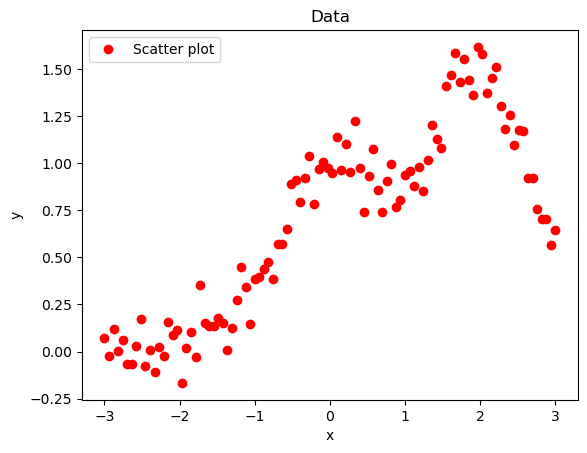

In [3]:
# Make data set
np.random.seed()
n = 100

x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

Simple_test_data = DataHandler(x, y)

##Plot the scatter
plt.figure()
plt.title("Data")
plt.plot(x, y, 'ro', label = 'Scatter plot')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



## Present a critical discussion of how/why you have scaled the data
Assumption: Subtracting the mean value centres the data around zero - large/small values won't be as affected by the different regression models. For a larger deviation from zero, it might have been necessary to scale values down, but here the y-values are all within +-1 so that won't be necessary.

## Perform ordinary least squares analysis using polynomials x and y up to fifth order

## Evaluate MSE and R2

### Plot the MSE and R2 values as functions of degree - plot also the params beta as you increase the order

y_max:  1.5825255618731855
y_min:  -0.21617454767744823
y_mean:  0.6864570826712645
y_scaled_max:  0.896068479201921
y_scaled_min:  -0.9026316303487127
y_scaled_mean:  5.329070518200751e-17
Degrees:  1
OLS training MSE:  0.06856390651314201
OLS test MSE:  0.04373842434769199


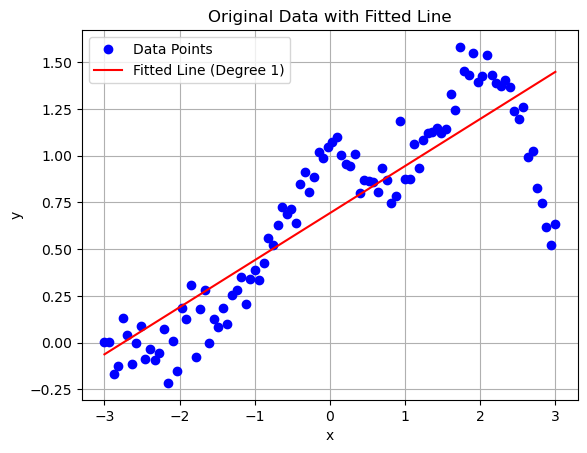

Degrees:  2
OLS training MSE:  0.04837649268903123
OLS test MSE:  0.03780832158234072


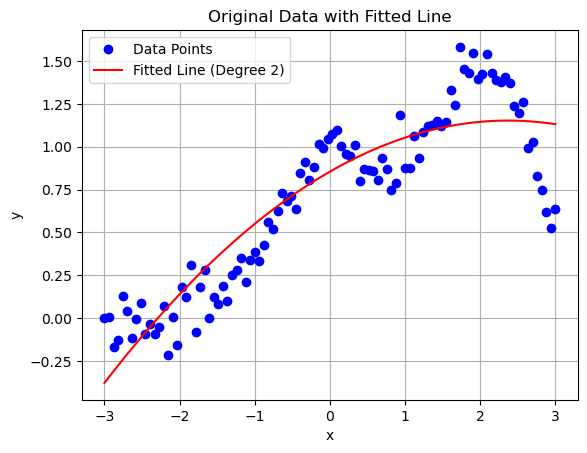

Degrees:  3
OLS training MSE:  0.027149110754885186
OLS test MSE:  0.034714303114469026


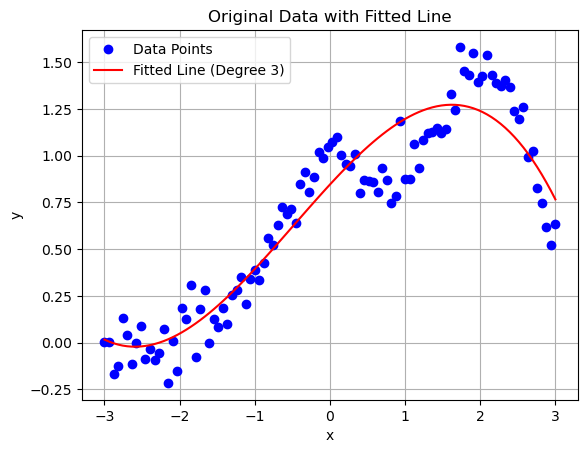

Degrees:  4
OLS training MSE:  0.028520412779581533
OLS test MSE:  0.023250681456274257


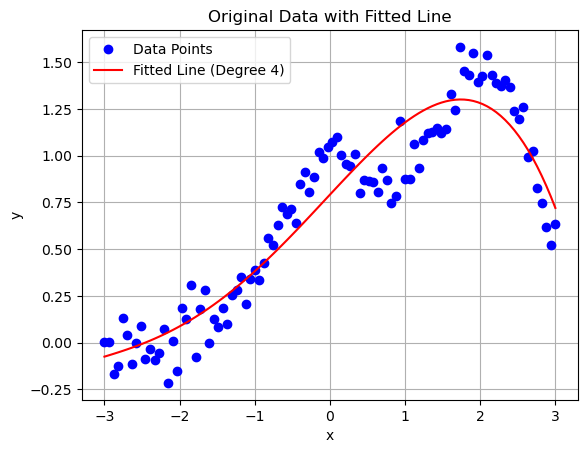

Degrees:  5
OLS training MSE:  0.017879098371117917
OLS test MSE:  0.0256167712358717


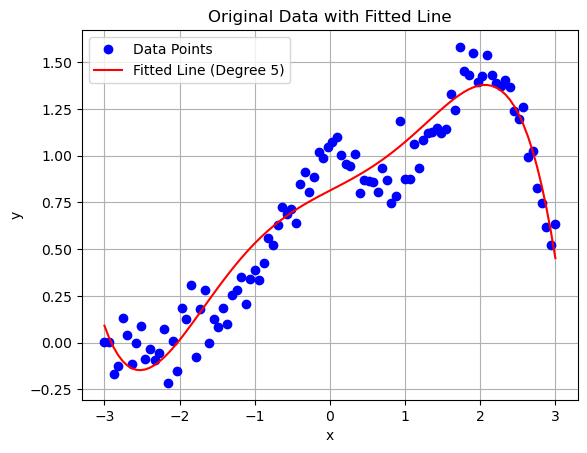

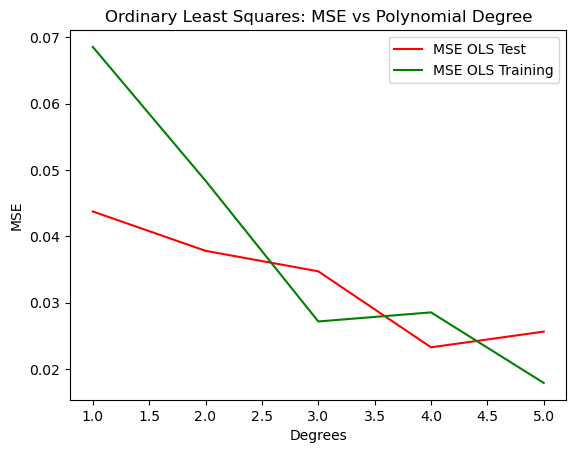

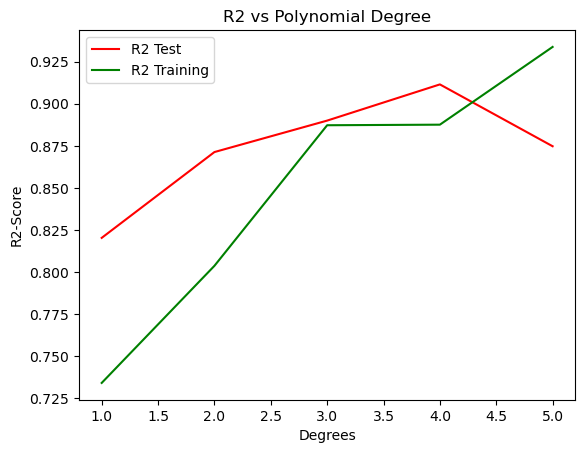

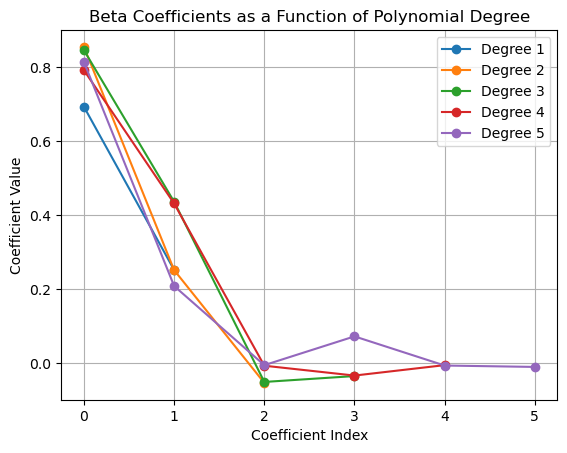

In [109]:
# Scale the data:

#First take a superficial look at the values:
print("y_max: ", y.max())
print("y_min: ", y.min())
y_mean = y.mean()
print("y_mean: ", y.mean())

#Subtract the mean value
y_list = []
for value in y:
    y_list.append(value - y_mean)

y_scaled = np.array(y_list)
#TODO: Look at https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-standard-scaler-section

print("y_scaled_max: ", y_scaled.max())
print("y_scaled_min: ", y_scaled.min())
print("y_scaled_mean: ", y_scaled.mean())

#Before progressing: Test that code behaves as expected
Simple_test_data.OLS_MSE_works_as_expected()

#Calculate mse and r2 for degrees 1-5
ols_training_mses = []
ols_test_mses = []

betas = []

training_r2s = []
test_r2s = []

degrees = range(1,6)
for order in degrees:
    Simple_test_data.CreateFeatureMatrix(order)
    
    ols_training_mse, ols_test_mse = Simple_test_data.OrdinaryLeastSquaresMSE()
    r2_training, r2_test = Simple_test_data.R2ScoreFunction()
    
    ols_training_mses.append(ols_training_mse)
    ols_test_mses.append(ols_test_mse)

    beta = Simple_test_data.Get_beta()
    betas.append(beta)

    training_r2s.append(r2_training)
    test_r2s.append(r2_test)

    X_train, X_test, y_tilde, y_predict = Simple_test_data.Get_predictions()

    print("Degrees: ", order)
    print("OLS training MSE: ", ols_training_mse)
    print("OLS test MSE: ", ols_test_mse)

    #For testing - plotting the fitted line over the data points:
    Simple_test_data.Create_test_plot(order)

#TODO: Make labels and title better
#Plot the mse vs. degrees
plt.figure()
plt.title("Ordinary Least Squares: MSE vs Polynomial Degree")
plt.plot(degrees, ols_test_mses, 'r', label = 'MSE OLS Test')
plt.plot(degrees, ols_training_mses, 'g', label = 'MSE OLS Training')

plt.xlabel('Degrees')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Plot the r2 scores vs. degrees
plt.figure()
plt.title("R2 vs Polynomial Degree")
plt.plot(degrees, test_r2s, 'r', label = 'R2 Test')
plt.plot(degrees, training_r2s, 'g', label = 'R2 Training')

plt.xlabel('Degrees')
plt.ylabel('R2-Score')
plt.legend()
plt.show()

#From ChatGPT:
#Plot beta vs degrees
for i in range(len(betas)):
    plt.plot(betas[i], marker='o', label=f'Degree {degrees[i]}')

# Adding plot details
plt.title('Beta Coefficients as a Function of Polynomial Degree')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.show()



### Comment on the above results
For ols beta values, it seems only the first order has a value of 1, after this all values are zero.
The mse value for 1 degree is also the lowest, so makes sense?

# Part b: Adding Ridge Regression to the Franke function
## Write your own code for the ridge method, using either matrix inversion or the singular value decomposition
## Perform same analysis as in a, but now for different values of lambda
SVD: y~​Ridge​=j=0∑p−1​uj​ujT​σj2​+λσj2​​y

Matrix inversion:
βRidge​=(XTX+λI)−1XTy
y~​Ridge​=XβRidge

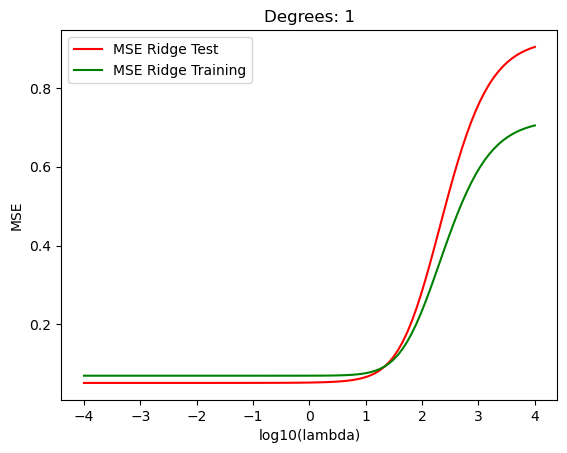

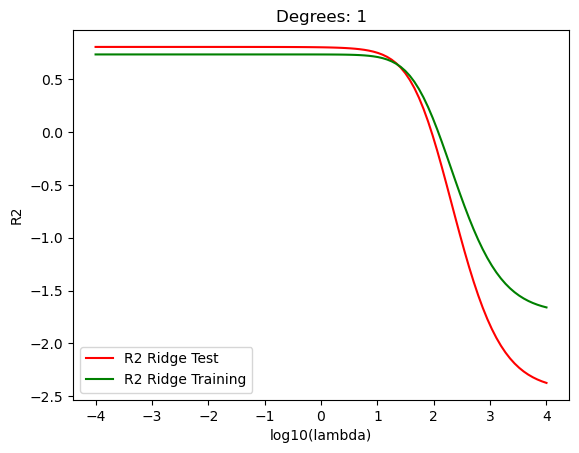

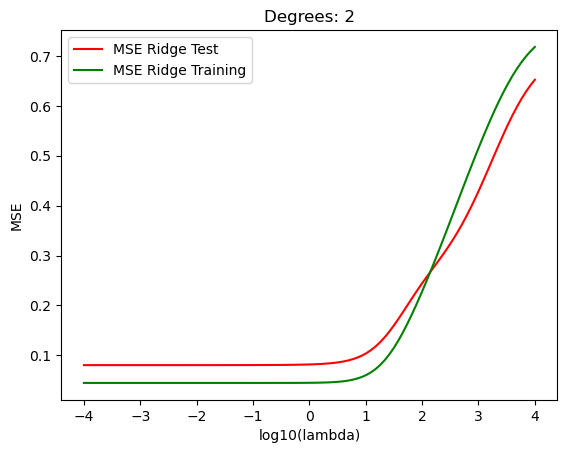

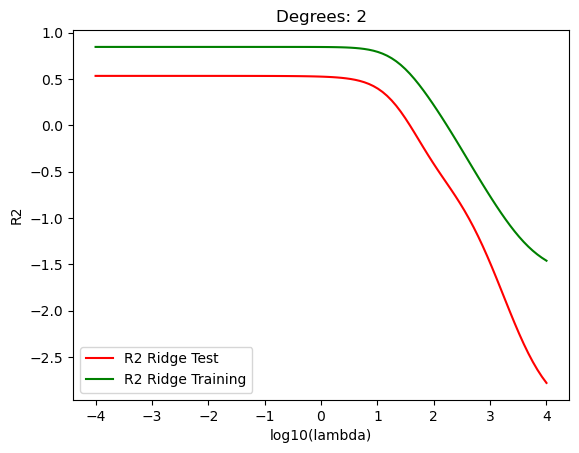

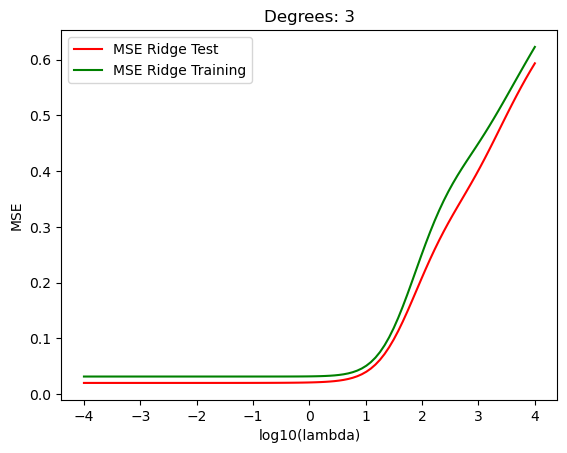

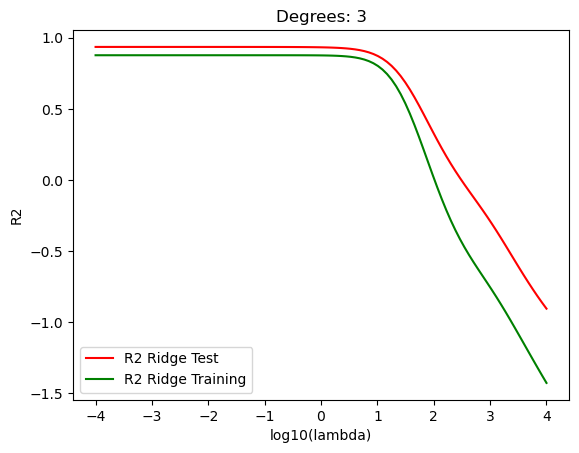

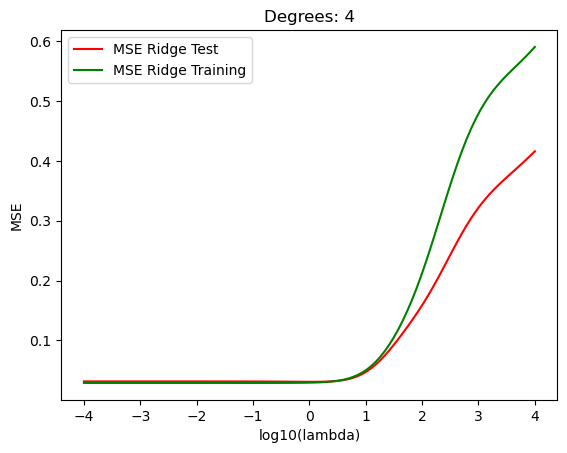

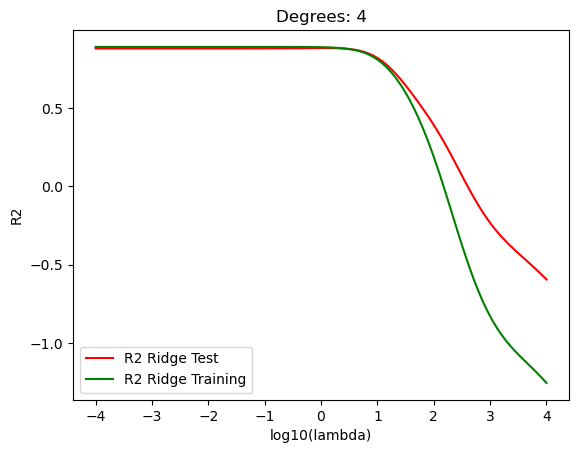

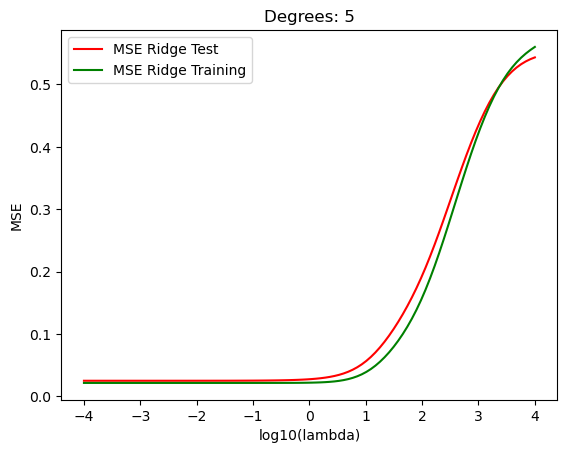

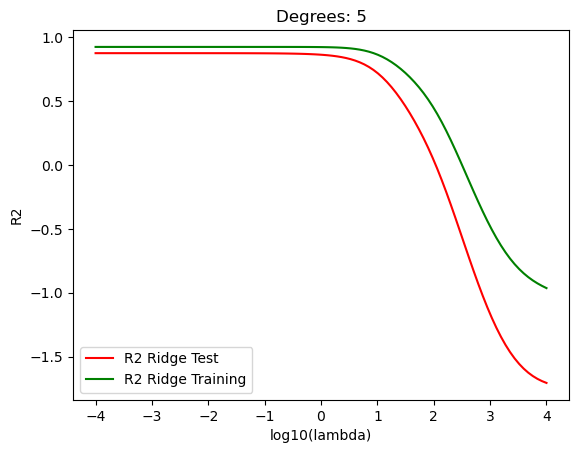

In [170]:
# Ridge Regression using matrix inversion
def Beta_ridge_regression(X, y, lmb): 
    I = np.identity(X.shape[1])

    return np.linalg.pinv(X.T.dot(X) + lmb*I) @ X.T.dot(y)

def Calculate_y_ridge(X, beta):
    return X.dot(beta)

#TODO: Write a similar test fct as for ols. Need to set X = I, and lmb = 0:
#X = np.identity(100)
#print(training_ridge_mses)

degrees = range(1,6)
for order in degrees:
    X = Simple_test_data.CreateFeatureMatrix(order)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    training_ridge_mses = []
    test_ridge_mses = []
    training_r2s = []
    test_r2s = []
    betas = []
    lambdas = (0.0001, 0.001, 0.01, 0.1, 1.0)
    nlambdas = 100
    lambdas = np.logspace(-4, 4, nlambdas)
    for i in range(nlambdas):
        lmb = lambdas[i]
        beta_hat_ridge = Beta_ridge_regression(X_train, y_train, lmb, order)
        betas.append(beta_hat_ridge)

        y_tilde = Calculate_y_ridge(X_train, beta_hat_ridge)
        y_predict = Calculate_y_ridge(X_test, beta_hat_ridge)

        training_ridge_mses.append(error.mean_squared_error(y_train, y_tilde))
        test_ridge_mses.append(error.mean_squared_error(y_test, y_predict))

        training_r2s.append(error.r2_score(y_train, y_tilde))
        test_r2s.append(error.r2_score(y_test, y_predict))

    # MSE Ridge plots
    plt.figure()
    plt.title("Degrees: " + str(order))
    plt.plot(np.log10(lambdas), test_ridge_mses, 'r', label = 'MSE Ridge Test')
    plt.plot(np.log10(lambdas), training_ridge_mses, 'g', label = 'MSE Ridge Training')

    plt.xlabel('log10(lambda)')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

    # R2 Ridge plots
    plt.figure()
    plt.title("Degrees: " + str(order))
    plt.plot(np.log10(lambdas), test_r2s, 'r', label = 'R2 Ridge Test')
    plt.plot(np.log10(lambdas), training_r2s, 'g', label = 'R2 Ridge Training')

    plt.xlabel('log10(lambda)')
    plt.ylabel('R2')
    plt.legend()
    plt.show()

    #TODO: Should there be a similar comparison of beta values depending on lambda?
    #From ChatGPT:
    #Plot beta vs degrees
    # for i in range(len(betas)):
    #     plt.plot(betas[i], marker='o', label=f'Lambdas {lambdas[i]}')

    # # Adding plot details
    # plt.title('Beta Coefficients as a Function of lambda')
    # plt.xlabel('Coefficient Index')
    # plt.ylabel('Coefficient Value')
    # plt.legend()
    # plt.grid(True)
    # plt.show()
    
    # Now plot the results
    # plt.figure()
    # plt.plot(np.log10(lambdas), test_ridge_mses, 'r--', label = 'MSE Ridge Train')
    # #plt.plot(np.log10(lambdas), MSELassoPredict, 'r--', label = 'MSE Lasso Train')
    # plt.xlabel('log10(lambda)')
    # plt.ylabel('MSE')
    # plt.legend()
    # plt.show()





    



# Compare and analyse your results with those from part a, with the ordinary least squares method. Study the dependence on lambda

# Part c: Adding Lasso to the Franke function
## Repeat part a and b, but now with Lasso Regression (can use sklearn functions - but note it excludes the intercept by default)

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import linear_model

n = 100
#x = np.linspace(-3, 3, n).reshape(-1, 1)
x = np.random.rand(n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)


#y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.randn(n)

Maxpolydegree = 5
X = np.zeros((len(x),Maxpolydegree))
X[:,0] = 1.0

# for polydegree in range(1,Maxpolydegree):
#     X[:,polydegree] = x**(polydegree)

#Fcn from lecture notes
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

def Lasso_Test():
    #I = np.identity(100)
    #I = np.identity(X.shape[1])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # RegLasso = linear_model.Lasso(lmb,fit_intercept=False)
    # RegLasso.fit(X_train,y_train)
    # # and then make the prediction
    # ypredictLasso = RegLasso.predict(X_test)

    #RegLasso = linear_model.Lasso(alpha=1e-15, fit_intercept=False)
    RegLasso = linear_model.Lasso(0, fit_intercept=False)
    #RegLasso.fit(I,y)
    RegLasso.fit(X_train, y_train)
    y_tilde_Lasso = RegLasso.predict(X_train)

    ypredictLasso = RegLasso.predict(X_test)
    
    #print(y_train, y_tilde_Lasso)

    #print(MSE(y_train,y_tilde_Lasso))
    #print(MSE(y_test,ypredictLasso))

    return MSE(y_train, y_tilde_Lasso)

mse_test = Lasso_Test()
print(mse_test)

# degrees = range(1,6)
# for order in degrees:
#     X = Simple_test_data.CreateFeatureMatrix(order)

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#     training_lasso_mses = []
#     test_lasso_mses = []
#     training_r2s = []
#     test_r2s = []
#     betas = []
#     nlambdas = 100
#     lambdas = np.logspace(-4, 4, nlambdas)
#     for i in range(nlambdas):
#         lmb = lambdas[i]
#         RegLasso = linear_model.Lasso(lmb)
#         RegLasso.fit(X,y)
#         y_tilde_Lasso = RegLasso.predict(X_train)
#         y_predict_Lasso = RegLasso.predict(X_test)
#         #print(RegLasso.coef_)
#         test_lasso_mses.append(MSE(y_test, y_predict_Lasso))
#         training_lasso_mses.append(MSE(y_train, y_tilde_Lasso))


#     # MSE Lasso plots
#     plt.figure()
#     plt.title("Degrees: " + str(order))
#     #plt.plot(np.log10(lambdas), test_lasso_mses, 'r', label = 'MSE Lasso Test')
#     plt.plot(np.log10(lambdas), training_lasso_mses, 'g', label = 'MSE Lasso Training')
#     plt.xlabel('log10(lambda)')
#     plt.ylabel('MSE')
#     plt.legend()
#     plt.show()

    # # R2 Ridge plots
    # plt.figure()
    # plt.title("Degrees: " + str(order))
    # plt.plot(np.log10(lambdas), test_r2s, 'r', label = 'R2 Ridge Test')
    # plt.plot(np.log10(lambdas), training_r2s, 'g', label = 'R2 Ridge Training')

    # plt.xlabel('log10(lambda)')
    # plt.ylabel('R2')
    # plt.legend()
    # plt.show()

0.009382612842299845


/opt/miniconda3/lib/python3.12/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.753e-01, tolerance: 7.191e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coo

0.001 [ 1.09078565 -0.35992575  0.8569332  -1.96110052  1.31503745]
0.001 [ 1.06848666 -0.2040817  -0.          0.          0.00764522]
0.021544346900318832 [ 1.08444329 -0.2381994   0.32432493 -1.14921272  0.91528033]
0.021544346900318832 [ 0.94716621 -0.         -0.         -0.         -0.        ]
0.46415888336127775 [ 1.07880806 -0.11333989 -0.28437685 -0.14982403  0.39627778]
0.46415888336127775 [0.50455168 0.         0.         0.         0.        ]
10.0 [ 1.07704160e+00 -1.75746880e-01 -1.68106562e-01  2.66363361e-04
  1.72880329e-01]
10.0 [0. 0. 0. 0. 0.]


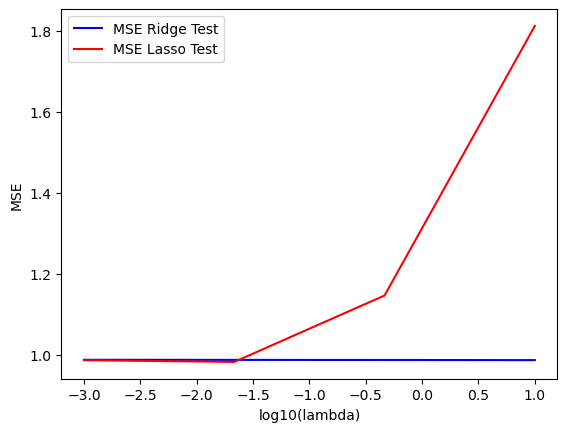

In [13]:
#From lecture notes:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

# Make data set.
n = 10000
x = np.random.rand(n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.randn(n)

Maxpolydegree = 5
X = np.zeros((len(x),Maxpolydegree))
X[:,0] = 1.0


for polydegree in range(1,Maxpolydegree):
    X[:,polydegree] = x**(polydegree)

# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# matrix inversion to find beta
OLSbeta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train
#print(OLSbeta)
ypredictOLS = X_test @ OLSbeta
#print("Test MSE OLS")
#print(MSE(y_test,ypredictOLS))
# Repeat now for Lasso and Ridge regression and various values of the regularization parameter using Scikit-Learn
# Decide which values of lambda to use
nlambdas = 4
#MSERidgePredict = np.zeros(nlambdas)
#MSELassoPredict = np.zeros(nlambdas)
lambdas = np.logspace(-3, 1, nlambdas)
    #for i in range(nlambdas):
    #lmb = lambdas[i]
    # Make the fit using Ridge and Lasso
lmb = 0
RegRidge = linear_model.Ridge(lmb,fit_intercept=False)
RegRidge.fit(X_train,y_train)
RegLasso = linear_model.Lasso(lmb,fit_intercept=False)
RegLasso.fit(X_train,y_train)
# and then make the prediction
ypredictRidge = RegRidge.predict(X_test)
ypredictLasso = RegLasso.predict(X_test)
# Compute the MSE and print it
MSERidgePredict[i] = MSE(y_test,ypredictRidge)
MSELassoPredict[i] = MSE(y_test,ypredictLasso)
print(lmb,RegRidge.coef_)
print(lmb,RegLasso.coef_)
# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSERidgePredict, 'b', label = 'MSE Ridge Test')
plt.plot(np.log10(lambdas), MSELassoPredict, 'r', label = 'MSE Lasso Test')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Give a detailed discussion of the three methods, and a judgement of which method suits the data set

# Part d: Pen and paper part
## Variance and expectation value stuff

# Part e: Bias-variance trade-off and resampling techniques


# Part f: Cross-validation as resampling techniques, adding more complexity

# Part g: Analysis of real data
## Repeat a-f with real data

## Present a critical discussion of the results, discussing the applicability of these regression methods to the type of data used here

## Include link to github repo? With a folder for results/plots?